## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  71.752385  1354.098089  0.329932   9.761364  1.402965
1  76.205784   998.767701  0.212913   2.114973  1.303104
2  50.135661   422.247177  0.610655  10.874473  1.431547
3  86.746356  1701.410715  0.664063   9.227108  1.416022
4  15.775882   224.234280  0.178376   5.616927  1.034811


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9340318	total: 69.1ms	remaining: 1m 9s
1:	learn: 0.9262162	total: 69.8ms	remaining: 34.8s
2:	learn: 0.9178122	total: 70.3ms	remaining: 23.4s
3:	learn: 0.9092986	total: 70.9ms	remaining: 17.7s
4:	learn: 0.9007465	total: 71.4ms	remaining: 14.2s
5:	learn: 0.8936232	total: 71.9ms	remaining: 11.9s
6:	learn: 0.8846057	total: 72.5ms	remaining: 10.3s
7:	learn: 0.8744208	total: 73ms	remaining: 9.05s
8:	learn: 0.8643760	total: 73.5ms	remaining: 8.09s
9:	learn: 0.8562700	total: 74ms	remaining: 7.33s
10:	learn: 0.8488076	total: 74.5ms	remaining: 6.7s
11:	learn: 0.8411945	total: 74.9ms	remaining: 6.17s
12:	learn: 0.8342797	total: 75.4ms	remaining: 5.73s
13:	learn: 0.8261234	total: 76.1ms	remaining: 5.36s
14:	learn: 0.8181185	total: 76.6ms	remaining: 5.03s
15:	learn: 0.8100296	total: 77.2ms	remaining: 4.75s
16:	learn: 0.8032613	total: 77.8ms	remaining: 4.5s
17:	learn: 0.7942420	total: 78.2ms	remaining: 4.26s
18:	learn: 0.7879445	total: 78.8ms	remaining: 4.07

85:	learn: 0.4669499	total: 108ms	remaining: 1.14s
86:	learn: 0.4636290	total: 108ms	remaining: 1.14s
87:	learn: 0.4601983	total: 109ms	remaining: 1.13s
88:	learn: 0.4578339	total: 109ms	remaining: 1.12s
89:	learn: 0.4541552	total: 110ms	remaining: 1.11s
90:	learn: 0.4519559	total: 110ms	remaining: 1.1s
91:	learn: 0.4490495	total: 111ms	remaining: 1.09s
92:	learn: 0.4459982	total: 111ms	remaining: 1.08s
93:	learn: 0.4430657	total: 112ms	remaining: 1.07s
94:	learn: 0.4397684	total: 112ms	remaining: 1.07s
95:	learn: 0.4363803	total: 112ms	remaining: 1.06s
96:	learn: 0.4333274	total: 113ms	remaining: 1.05s
97:	learn: 0.4308657	total: 113ms	remaining: 1.04s
98:	learn: 0.4284640	total: 114ms	remaining: 1.03s
99:	learn: 0.4265680	total: 114ms	remaining: 1.03s
100:	learn: 0.4237170	total: 115ms	remaining: 1.02s
101:	learn: 0.4215652	total: 115ms	remaining: 1.01s
102:	learn: 0.4194210	total: 115ms	remaining: 1s
103:	learn: 0.4165794	total: 116ms	remaining: 997ms
104:	learn: 0.4141459	total: 11

276:	learn: 0.2007662	total: 186ms	remaining: 487ms
277:	learn: 0.1998779	total: 187ms	remaining: 485ms
278:	learn: 0.1991222	total: 187ms	remaining: 484ms
279:	learn: 0.1983744	total: 188ms	remaining: 483ms
280:	learn: 0.1974612	total: 188ms	remaining: 482ms
281:	learn: 0.1969440	total: 189ms	remaining: 480ms
282:	learn: 0.1963582	total: 189ms	remaining: 479ms
283:	learn: 0.1958812	total: 189ms	remaining: 477ms
284:	learn: 0.1953599	total: 190ms	remaining: 476ms
285:	learn: 0.1945784	total: 190ms	remaining: 474ms
286:	learn: 0.1938340	total: 190ms	remaining: 473ms
287:	learn: 0.1930625	total: 191ms	remaining: 472ms
288:	learn: 0.1923208	total: 191ms	remaining: 470ms
289:	learn: 0.1918247	total: 192ms	remaining: 469ms
290:	learn: 0.1908811	total: 192ms	remaining: 468ms
291:	learn: 0.1903634	total: 192ms	remaining: 466ms
292:	learn: 0.1895266	total: 193ms	remaining: 465ms
293:	learn: 0.1884661	total: 193ms	remaining: 464ms
294:	learn: 0.1879731	total: 193ms	remaining: 462ms
295:	learn: 

524:	learn: 0.0909056	total: 288ms	remaining: 261ms
525:	learn: 0.0905632	total: 289ms	remaining: 260ms
526:	learn: 0.0902376	total: 289ms	remaining: 259ms
527:	learn: 0.0899906	total: 290ms	remaining: 259ms
528:	learn: 0.0895857	total: 290ms	remaining: 258ms
529:	learn: 0.0892390	total: 290ms	remaining: 257ms
530:	learn: 0.0889233	total: 291ms	remaining: 257ms
531:	learn: 0.0886827	total: 291ms	remaining: 256ms
532:	learn: 0.0884436	total: 291ms	remaining: 255ms
533:	learn: 0.0882108	total: 292ms	remaining: 255ms
534:	learn: 0.0879825	total: 292ms	remaining: 254ms
535:	learn: 0.0875940	total: 293ms	remaining: 253ms
536:	learn: 0.0872151	total: 293ms	remaining: 253ms
537:	learn: 0.0869050	total: 293ms	remaining: 252ms
538:	learn: 0.0865364	total: 294ms	remaining: 251ms
539:	learn: 0.0862306	total: 294ms	remaining: 251ms
540:	learn: 0.0859313	total: 295ms	remaining: 250ms
541:	learn: 0.0856383	total: 295ms	remaining: 250ms
542:	learn: 0.0853516	total: 296ms	remaining: 249ms
543:	learn: 

712:	learn: 0.0516327	total: 367ms	remaining: 148ms
713:	learn: 0.0514484	total: 367ms	remaining: 147ms
714:	learn: 0.0512292	total: 368ms	remaining: 147ms
715:	learn: 0.0509955	total: 368ms	remaining: 146ms
716:	learn: 0.0509193	total: 368ms	remaining: 145ms
717:	learn: 0.0508440	total: 369ms	remaining: 145ms
718:	learn: 0.0506862	total: 369ms	remaining: 144ms
719:	learn: 0.0505418	total: 370ms	remaining: 144ms
720:	learn: 0.0503119	total: 370ms	remaining: 143ms
721:	learn: 0.0501343	total: 370ms	remaining: 143ms
722:	learn: 0.0500082	total: 371ms	remaining: 142ms
723:	learn: 0.0498149	total: 371ms	remaining: 142ms
724:	learn: 0.0497417	total: 372ms	remaining: 141ms
725:	learn: 0.0496008	total: 372ms	remaining: 140ms
726:	learn: 0.0494789	total: 373ms	remaining: 140ms
727:	learn: 0.0493302	total: 373ms	remaining: 139ms
728:	learn: 0.0491300	total: 373ms	remaining: 139ms
729:	learn: 0.0489000	total: 374ms	remaining: 138ms
730:	learn: 0.0487616	total: 374ms	remaining: 138ms
731:	learn: 

953:	learn: 0.0263676	total: 470ms	remaining: 22.6ms
954:	learn: 0.0263100	total: 470ms	remaining: 22.2ms
955:	learn: 0.0262534	total: 471ms	remaining: 21.7ms
956:	learn: 0.0261938	total: 471ms	remaining: 21.2ms
957:	learn: 0.0261114	total: 471ms	remaining: 20.7ms
958:	learn: 0.0260517	total: 472ms	remaining: 20.2ms
959:	learn: 0.0259636	total: 472ms	remaining: 19.7ms
960:	learn: 0.0259055	total: 473ms	remaining: 19.2ms
961:	learn: 0.0258503	total: 473ms	remaining: 18.7ms
962:	learn: 0.0257930	total: 473ms	remaining: 18.2ms
963:	learn: 0.0257386	total: 474ms	remaining: 17.7ms
964:	learn: 0.0256596	total: 474ms	remaining: 17.2ms
965:	learn: 0.0255895	total: 475ms	remaining: 16.7ms
966:	learn: 0.0255258	total: 475ms	remaining: 16.2ms
967:	learn: 0.0254632	total: 475ms	remaining: 15.7ms
968:	learn: 0.0253777	total: 476ms	remaining: 15.2ms
969:	learn: 0.0253161	total: 476ms	remaining: 14.7ms
970:	learn: 0.0252392	total: 476ms	remaining: 14.2ms
971:	learn: 0.0251711	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

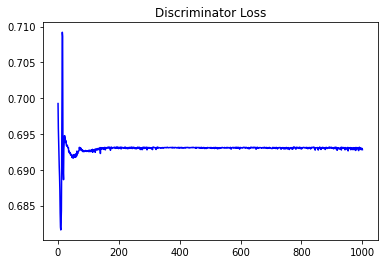

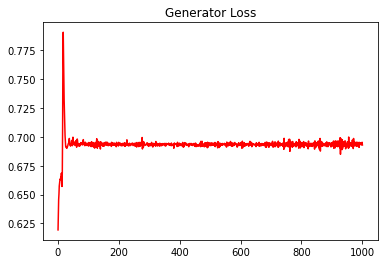

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5612618891783341


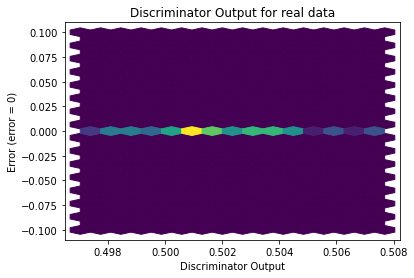

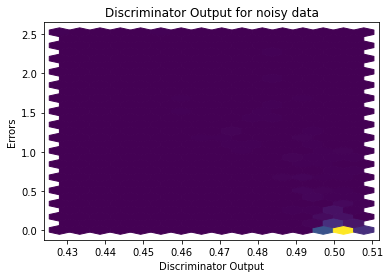

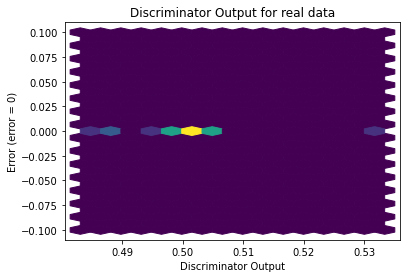

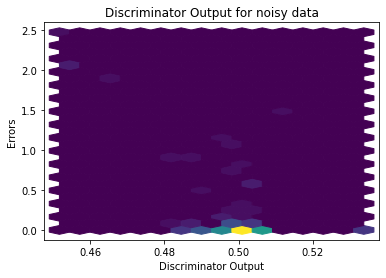

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


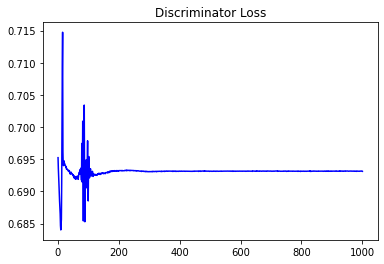

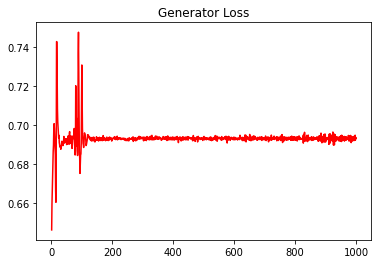

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6035262726767031


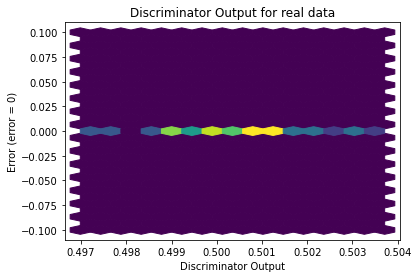

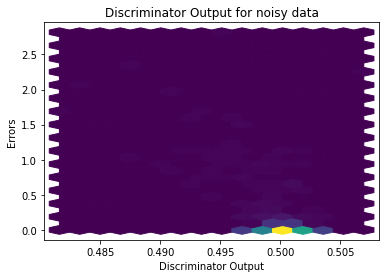

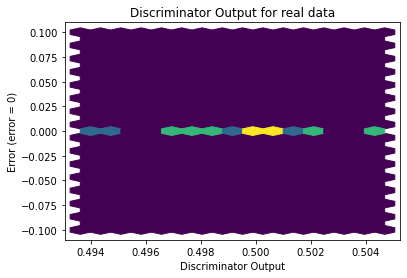

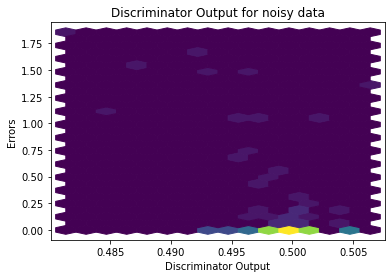

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6632]], requires_grad=True)
